# UBER data analysis using python
#import the uber dataset
#load necessary libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
#loading the uber dataset in to pandas dataframe

uberdata_df=pd.read_csv('C:/Users/user/Desktop/uberdataset.csv')

In [14]:
uberdata_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [16]:
uberdata_df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [17]:
#shows the dimensions of dataset

uberdata_df.shape

(1156, 7)

In [18]:
#shows the size of the data

uberdata_df.size

8092

In [19]:
#shows all the information about the variables in the dataset

uberdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [21]:
#checking for missing data

uberdata_df.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of       START_DATE*  END_DATE*  CATEGORY*  START*  STOP*  MILES*  PURPOSE*
0           False      False      False   False  False   False     False
1           False      False      False   False  False   False      True
2           False      False      False   False  False   False     False
3           False      False      False   False  False   False     False
4           False      False      False   False  False   False     False
...           ...        ...        ...     ...    ...     ...       ...
1151        False      False      False   False  False   False     False
1152        False      False      False   False  False   False     False
1153        False      False      False   False  False   False     False
1154        False      False      False   False  False   False     False
1155        False       True       True    True   True   False      True

[1156 rows x 7 columns]>

In [23]:
#how many missing values are present

uberdata_df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [51]:
#crete a initail data (name it ub) with dropping the NA values and checking again

ub=uberdata_df.dropna()
ub.isnull().any()

START_DATE*    False
END_DATE*      False
CATEGORY*      False
START*         False
STOP*          False
MILES*         False
PURPOSE*       False
dtype: bool

In [26]:
#summary of original data(before droppin na values)

uberdata_df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [27]:
#checking the information of new dataframe

ub.describe()

,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


In [31]:
#Get the unique start destinations

uni_start_destination=uberdata_df["START*"].dropna()
uni_start=set(uni_start_destination)
uni_start

{'Agnew',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Asheville',
 'Austin',
 'Banner Elk',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'CBD',
 'Capitol One',
 'Cary',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Connecticut Avenue',
 'Convention Center District',
 'Cory',
 'Couples Glen',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Downtown',
 'Durham',
 'Eagan Park',
 'Eagle Rock',
 'East Austin',
 'East Elmhurst',
 'East Harlem',
 'Eastgate',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Elmhurst',
 'Emeryville',
 'Fairmont',
 'Farmington Woods',
 'Fayetteville Street',
 'Financial District',
 'Flatiron District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Georgian Acres',
 'Gulfton',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Holly Springs',
 'Houston',
 'Hu

In [32]:
#Total number of unique start destinations
len(uni_start)

177

In [38]:
#Total number of unque stop destinations

stop_destination=uberdata_df["STOP*"].dropna()
uni_stop=set(stop_destination)
len(uni_stop)

188

In [43]:
#Print all the uber trips thart has the starting point of san francisco.

uberdata_df[uberdata_df['START*']=='San Francisco']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
362,5/9/2016 14:39,5/9/2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
440,6/14/2016 16:09,6/14/2016 16:39,Business,San Francisco,Emeryville,11.6,Meeting
836,10/19/2016 14:02,10/19/2016 14:31,Business,San Francisco,Berkeley,10.8,NaN
917,11/7/2016 19:17,11/7/2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11/8/2016 12:16,11/8/2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting
927,11/9/2016 18:40,11/9/2016 19:17,Business,San Francisco,Oakland,12.7,Customer Visit
933,11/10/2016 15:17,11/10/2016 15:22,Business,San Francisco,Oakland,9.9,Temporary Site
966,11/15/2016 20:44,11/15/2016 21:00,Business,San Francisco,Berkeley,11.8,Temporary Site


In [46]:
#what is the Most popular starting point of uber drivers?

starting_point=uberdata_df['START*'].dropna()

ub=pd.DataFrame(starting_point.value_counts())

ub.sort_values(["START*"],ascending=False)



ub=ub.reset_index()
ub=ub.rename(columns={'index':'starting_destination','START*':'count'})
ub.loc[ub['count']==max(ub['count'])]

,starting_destination,count
0,Cary,201


In [47]:

#what is the Most popular dropping point for the uber drivers?

stopping_point=uberdata_df['STOP*'].dropna()

ub=pd.DataFrame(stopping_point.value_counts())

ub.sort_values(["STOP*"],ascending=False)



ub=ub.reset_index()
ub=ub.rename(columns={'index':'stopping_destination','STOP*':'count'})
ub.loc[ub['count']==max(ub['count'])]

,stopping_destination,count
0,Cary,203


In [89]:
#list the most frequent route taken by uber drivers

ub=uberdata_df.dropna()
ub=pd.DataFrame(df.groupby(['START*','STOP*']).size())
ub

0
START*        STOP*                
Apex          Cary                1
              Holly Springs       1
Arabi         Metairie            1
Asheville     Topton              1
Austin        Katy                1
...                              ..
Whitebridge   Wayne Ridge         1
              Westpark Place      1
              Whitebridge         1
              Williamsburg Manor  1
Winston Salem Asheville           1

[239 rows x 1 columns]

In [90]:
ub=df.rename(columns={0:'count'})
ub

count
START*           STOP*                  
Cary             Morrisville          52
Morrisville      Cary                 51
Cary             Cary                 44
Unknown Location Unknown Location     30
Cary             Durham               30
...                                  ...
Katunayaka       Katunayaka            1
                 Unknown Location      1
Katunayake       Gampaha               1
Katy             Houston               1
Winston Salem    Asheville             1

[239 rows x 1 columns]

In [91]:
ub=df.sort_values(['count'],ascending=False)
ub

count
START*           STOP*                  
Cary             Morrisville          52
Morrisville      Cary                 51
Cary             Cary                 44
Unknown Location Unknown Location     30
Cary             Durham               30
...                                  ...
Rawalpindi       Rawalpindi            1
West Palm Beach  West Palm Beach       1
                 Palm Beach            1
Redmond          Bellevue              1
Winston Salem    Asheville             1

[239 rows x 1 columns]

In [92]:
ub.loc[df['count']==max(df['count'])]


,,count
START*,STOP*,
Cary,Morrisville,52


In [76]:
#Print all type of purpose for the trip in an array

zz=np.array(uberdata_df['PURPOSE*'].dropna().unique())
zz

array(['Meal/Entertain', 'Errand/Supplies', 'Meeting', 'Customer Visit',
       'Temporary Site', 'Between Offices', 'Charity ($)', 'Commute',
       'Moving', 'Airport/Travel'], dtype=object)

In [88]:
uberdata_df['MILES*'].groupby(uberdata_df['PURPOSE*']).sum()


PURPOSE*
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES*, dtype: float64

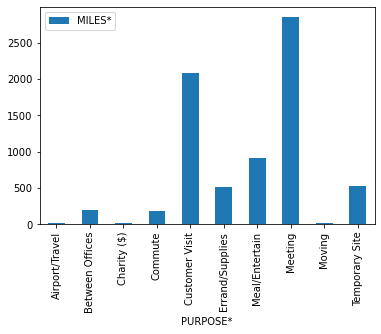

In [98]:
#Plot a bar graph of Purposes vs Distance.

ub=pd.DataFrame(uberdata_df['MILES*'].groupby(uberdata_df['PURPOSE*']).sum())
ub.plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='MILES*', ylabel='PURPOSE*'>

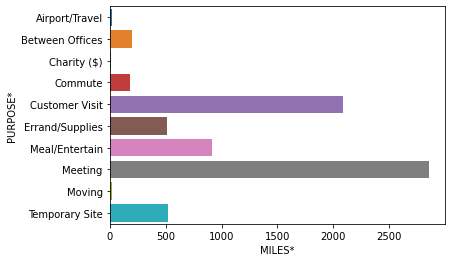

In [101]:
#Bar chart usung matplotlib

ub=ub.reset_index()
sns.barplot(x=ub['MILES*'],y=ub['PURPOSE*'])

In [104]:
#print a dataframe of purpose and distance travelled for that particular purpose

ub=pd.DataFrame(uberdata_df['MILES*'].groupby(uberdata_df['PURPOSE*']).sum())
ub

,MILES*
PURPOSE*,
Airport/Travel,16.5
Between Offices,197.0
Charity ($),15.1
Commute,180.2
Customer Visit,2089.5
Errand/Supplies,508.0
Meal/Entertain,911.7
Meeting,2851.3
Moving,18.2


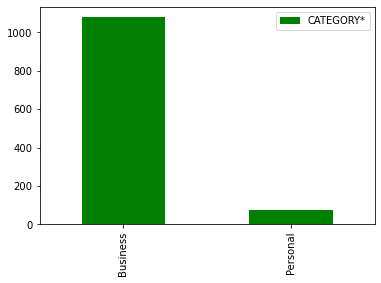

,CATEGORY*
Business,1078
Personal,77


In [117]:
#plot number of trips vs category of trips

uberdata_df.head()

ub=pd.DataFrame(uberdata_df['CATEGORY*'].value_counts())
ub.reset_index()

ub.plot(kind='bar',color='green')
plt.show()
ub

In [127]:

#what is proportion of trips that is business and what is the propotion of trips that is persoub

ub=uberdata_df.groupby(['CATEGORY*']).sum()

Business=ub.iloc[0,0]/(ub.iloc[0,0]+ub.iloc[1,0])
Personal=ub.iloc[1,0]/(ub.iloc[0,0]+ub.iloc[1,0])

print("Business:",Business)
print("Personal:",Personal)




Business: 0.9411947856153776
Personal: 0.058805214384622315
